<a href="https://colab.research.google.com/github/fernassouza/Data-Science/blob/master/Covid-19%20A%20Pandemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19

<center><img alt="Covid-19" width="50%" src="https://image.freepik.com/vetores-gratis/conceito-de-fundo-de-virus-de-surto-pandemico-de-coronavirus-covid-19_1017-24318.jpg"></center>

Em 30 de Janeiro de 2020, a OMS (Organização Mundial da Saúde), declarou Emergência de Saúde Pública de Importância mundial.

O COVID-19 (coronavirus), doença infecciosa da síndrome respiratória aguda grave (SARS-CoV-2), foi identificado pela primeira vez em Dezembro de 2019 na cidade de Wuhan, capital da provincia de Huebei, China, entre pacientes que tinham desenvolvido pneumonia sem causa identificável.

O virus se espalhou rapidamente pelo mundo, afetando drasticamente vários países, iniciando uma pandemia global.

Várias atitudes foram tomadas para tentar frear a disseminação do virus, mas mesmo assim causando um grande número de óbitos pelo mundo.
O Brasil infelizmente não ficou de fora desses números, sendo que até o momento , diversas cidades ainda se encontram enfrentando a pandemia e o número de óbitos vem aumentando.

Nesse projeto iremos investigar algumas informações para tirarmos insights com relação ao coronavirus.

# Obtenção dos dados

Para análise estarems utilizando os dados globais que estão sendo coletados pole site [Our World in Data](https://ourworldindata.org/).

"A mídia se concentra em eventos, Our World in Data se concentra em desenvolvimentos lentos, mas duradouros. Os canais de notícias que se concentram nos eventos não conseguem mostrar como o mundo está mudando, já que muitas das longas tendências que transformaram o mundo não são cobertas pelas notícias e certamente nunca chegam às manchetes".

Os dados que serão utilizados nesse projeto, podem ser encontradodos nesse [link](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv).

In [40]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importando banco de dados

DATA_PATH = ("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

df = pd.read_csv(DATA_PATH)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# verificando as dimenssóes do dataframe
print("Dimensão do DataFrame",
      "\nVariáveis", df.shape[1],
      "\nEntradas", df.shape[0])

# verificando as 5 primeiras linhas do dataframe
df.head()

Dimensão do DataFrame 
Variáveis 34 
Entradas 32794


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


### Dicionário de Variáveis

---
Aqui estão todas as variáveis com uma descrição do dataset, para poder termos uma melhor noção do que estaremos trabalhando:


* iso_code - ISO 3166-1 alpha-3 – código de três letras do país;
* continent - Continente;
* location - Locação geográfica;
* date - Data da observação;
* total_cases - Total de casos confirmados;
* new_cases - Novos casos confifrmados;
* total_deaths - Total de óbitos atribuidas ao COVID-19;
* new_deaths - Novas mortes atribuidas ao COVID-19;
* total_cases_per_million - Total de casos confirmados por 1.000.000 de pessoas;
* new_cases_per_million - Novos casos confirmados por 1.000.000 de pessoas;
* total_deaths_per_million - Total de óbitos confirmados por 1.000.000 de pessoas;
* new_deaths_per_million - Novas óbitos confirmadas por 1.000.000 de pessoas
* total_tests - Total de testes;
* new_tests - Novos testes;
* total_tests_per_thousand - Total de testes por 1000 pessoas;
* new_tests_per_thousand - Novos testes por 1000 pessoas;
* new_tests_smoothed - Novos testes por 1000 pessoas (7 dias) para países que não reportaram testagem diárias;
* new_tests_smoothed_per_thousand - Novos testes por 1000 pessoas (7 dias);
* tests_units -  unidade usada pela localização para reportar seus dados de teste;
* stringency_index - Índice de rigor da resposta do governo, baseada em 9 indicadores de responsbilidade;
* population - População em 2020;
* population_density - Relação entre população e território;
* median_age - Projeção da idade média;
* aged_65_older - Mais de 65 anos;
* aged_70_older - Mais de 70 anos em 2015;
* gdp_per_capita - Renda percapita em Dollar;
* extreme_poverty - Extrema pobreza ;
* cvd_death_rate - Doenças cardiovasculares em 2017;
* diabetes_prevalence - Prevalência de diabetes (% da população entre 20 e 79 anos) em 2017;
* female_smokers - Mulheres tabagistas;
* male_smokers - Homens tabagistas;
* handwashing_facilities - Percentagem da população com instalações básicas de lavagem das mãos nas instalações, último ano disponível;
* hospital_beds_per_thousand - Leitos de hospital por 1.000 pessoas, ano mais recente disponível desde 2010;
* life_expectancy - Expectativa de vida.

Abaixo verificaremos os tipos das variáveis do dataset.



In [ ]:
# verificando o tipo das variáveis do dataframe
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Abaixo verificaremos os valores nulos de cada variável em porcentagem.

In [ ]:
# verificando valores nulos em %
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100)

new_tests_per_thousand             69.0
new_tests                          69.0
total_tests_per_thousand           68.0
total_tests                        68.0
new_tests_smoothed_per_thousand    66.0
new_tests_smoothed                 66.0
tests_units                        63.0
handwashing_facilities             59.0
extreme_poverty                    41.0
male_smokers                       29.0
female_smokers                     28.0
stringency_index                   19.0
hospital_beds_per_thousand         18.0
aged_65_older                      11.0
gdp_per_capita                     11.0
aged_70_older                      10.0
median_age                         10.0
cardiovasc_death_rate              10.0
diabetes_prevalence                 7.0
population_density                  4.0
life_expectancy                     1.0
new_deaths_per_million              1.0
total_deaths_per_million            1.0
new_cases_per_million               1.0
total_cases_per_million             1.0


Pode-se verificar acima, que diversas variáveis com relação a teste estão com números elevados de ausência. Isto pode ser devido ao fato de que no começo da pandemia ainda não existiam testes disponíveis.

Vamos converter o tipo da variável date em dateime para podermos trabalhar melhor.

In [ ]:
# convertendo date(object) em formato datetime
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

Verificando a data mais recente no dataset.

In [ ]:
# data mais recente no data set
df.date.max()

Timestamp('2020-07-26 00:00:00')

Vamos verificar o total de óbitos no mundo e dos cinco primeiros países.

In [ ]:
# verificar total de casos
df.loc[df.date == '2020-07-26', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[:6]

,location,total_cases
32729,World,16018105.0
31195,United States,4178027.0
4437,Brazil,2394513.0
13933,India,1385522.0
24739,Russia,806720.0
27184,South Africa,434200.0


No total de casos registrados na data de 25-07-2020, podemos ver que no mundo é de 16.018.105, seguido por Estados Unidos com 4.178.027, Brasil com 2.394.513, India com 1.385.522, Russia com 806.720 e Africa do Sul com 434.200.

Vamos verificar o total de óbitos no mundo e dos cinco primeiros países.

In [ ]:
# verificar total de mortes
df.loc[df.date == '2020-07-26', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[:6]

,location,total_deaths
32729,World,644832.0
31195,United States,146460.0
4437,Brazil,86449.0
30986,United Kingdom,45738.0
19578,Mexico,43374.0
15304,Italy,35102.0


No total de óbitos registrados na data de 25-07-2020, podemos ver que no mundo é de 644.832, seguido por Estados Unidos com 146.460, Brasil com8 64.498, Reino Unido com 45.738, Mexico com 43.374 e Italia com 35.102.

Vamos verificar no gráfico abaixo, a curva de crescimento de óbitos no mundo  desde o inpicio da pandemia.

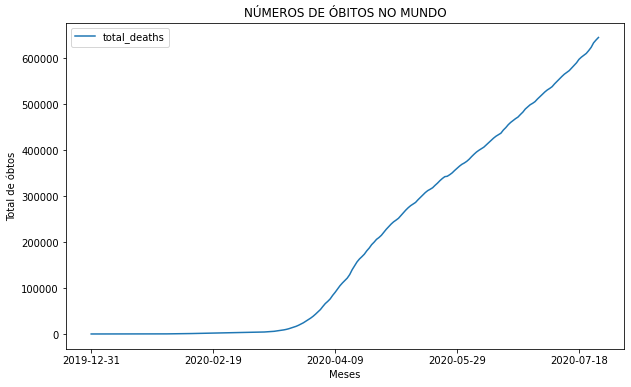

In [143]:
# criando gráfico para total de mortes no mundo
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

df.loc[df.location == 'World'].plot(x='date', y='total_deaths', ax = ax)

ax.set_title('NÚMEROS DE ÓBITOS NO MUNDO')
ax.set_ylabel('Total de óbtos')
ax.set_xlabel('Meses')

plt.show()

Como podemos ver no gráfico acima, há um grande crescimento exponencial de óbitos registrados no mundo a partir do meio de Maio.
Chegando ao número total de 639.273 até o momento.

Podemos perceber também que a curva continua em crescimento, a princiío indicando que a pandemia não se encontra controlada.

Vamos verificar no gráfico abaixo, a curva de crescimento do total de óbitos dos cinco primeio países.

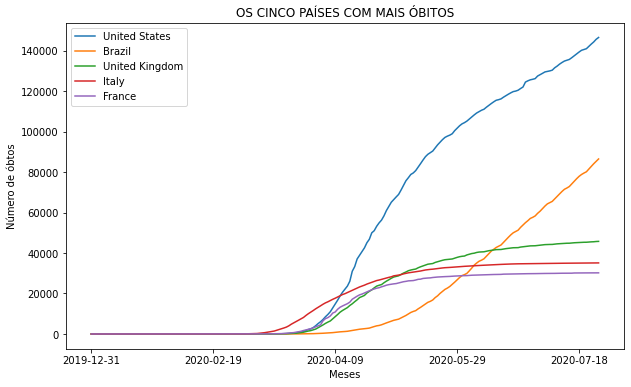

In [142]:
# verificando em gráfico os cinco primeiros países em morte
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

df.loc[df.location == 'United States'].plot(x='date', y='total_deaths', ax = ax)
df.loc[df.location == 'Brazil'].plot(x='date', y='total_deaths', ax = ax)
df.loc[df.location == 'United Kingdom'].plot(x='date', y='total_deaths', ax = ax)
df.loc[df.location == 'Italy'].plot(x='date', y='total_deaths', ax = ax)
df.loc[df.location == 'France'].plot(x='date', y='total_deaths', ax = ax)

ax.legend(['United States', 'Brazil', 'United Kingdom', 'Italy', 'France'])
ax.set_title('OS CINCO PAÍSES COM MAIS ÓBITOS')
ax.set_ylabel('Número de óbtos')
ax.set_xlabel('Meses')

plt.show()

Como podemos ver no gráfico acima, a pandemia teve inicio em periodos diferentes e com consequências diferentes.

Podemos ver que Estados Unidos e Brasil estão no topo com maior número de óbitos respectivamente e ainda enfrentando diretamente a pandemia.

Os outros países tem uma curva menor, com números de óbitos menor que os dois primeiros e com tendências a estabilização ou estabilizados.


Vamos verificar no gráfico abaixo a proporção total com relação a óbitos por milhão nos cinco países com mais óbitos no mundo.

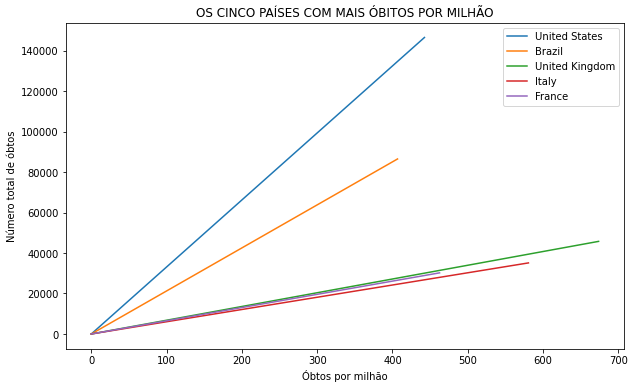

In [141]:
# total de mortes e mortes por milhão
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

df.loc[df.location == 'United States'].plot(x='total_deaths_per_million', y='total_deaths', ax = ax)
df.loc[df.location == 'Brazil'].plot(x='total_deaths_per_million', y='total_deaths', ax = ax)
df.loc[df.location == 'United Kingdom'].plot(x='total_deaths_per_million', y='total_deaths', ax = ax)
df.loc[df.location == 'Italy'].plot(x='total_deaths_per_million', y='total_deaths', ax = ax)
df.loc[df.location == 'France'].plot(x='total_deaths_per_million', y='total_deaths', ax = ax)

ax.legend(['United States', 'Brazil', 'United Kingdom', 'Italy', 'France'])
ax.set_title('OS CINCO PAÍSES COM MAIS ÓBITOS POR MILHÃO')
ax.set_ylabel('Número total de óbtos')
ax.set_xlabel('Óbtos por milhão')

plt.show()

Podemos verificar que mesmo Estados Unidos e Brasil tendo o maior número de óbitos respectivamente, a relação por milhão não se reflete. Sendo que estes dois países tem o menor número de óbitos por milhão.

Estes dados são apenas para análise, não desmerencendo o total de óbitos.

#COVID-19 no Brasil

No Brasil, a pandemia teve inicio em 26 de Fevereiro, com um homem de 61 anos que tinha retornado da Itália e testou positivo.

A circulação do vírus iniciou-se já em janeiro de acordo com a Fiocruz e a partir de Fevereiro, São Paulo já tinha transmissão comunitária.

O primeiro óbito foi registrado em São Paulo no dia 18 de Março. No dia 19 já subiram para 7 o número. Em 22 de Março alcançava-se 25 óbitos registrados no Brasil.
No dia 10 de Abril, o Brasil ultrapassou o número de 1000 óbitos e o número de casos confirmados já era de quase 20 mil.

Em 12 de junho, o Brasil superou o Reino Unido em número de óbitos, se tornando o segundo país com mais óbitos no mundo.

O número de casos confirmados e óbitos vem subindo vertiginosamente no Brasil, sendo São Paulo o Estado com o maior número de casos e óbitos registrados.


Agora vamos fazer uma copia do dataset original, trazendo apenas as informações relacionadas ao Brasil e ver as 5 primeiras entradas do dataset.

In [ ]:
# criando uma cópia do dataset original com somente o brasil
df_brasil = df.loc[df.location == 'Brazil'].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4229,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4230,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4231,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4232,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4233,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


Vamos verificar o primero registro no dataset que foi feito com relação ao Brasil.

In [ ]:
# data mais antiga
df_brasil.date.min()

Timestamp('2019-12-31 00:00:00')

Podemos identificar que o primeiro registro foi feito em 31-12-2019.

In [ ]:
# verificando a data mais antiga registrada
df_brasil.loc[df_brasil.date  == '2019-12-31', ['iso_code', 'continent', 'location', 'date', 'total_cases',	'new_cases', 'total_deaths', 'new_deaths']]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
4229,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0


Na data do primeiro registro, 31-12-2019, não tem nenhuma informação inserida quanto a casos ou óbitos registrados.

Vamos verificar o primeiro caso registrado no Brasil.

In [ ]:
# primeiro caso registrado
df_brasil.loc[df_brasil.new_cases != 0.0 ,['iso_code', 'location', 'date', 'new_cases']].head(1)

,iso_code,location,date,new_cases
4286,BRA,Brazil,2020-02-26,1.0


O primeiro caso registrado no Brasil foi no dia 26-02-2020.

Vamos verificar o primeiro óbito registrado no Brasil.

In [182]:
# primeira morte registrada
df_brasil.loc[df_brasil.new_deaths != 0.0, ['iso_code', 'location', 'date', 'new_cases', 'total_deaths']].head()

,iso_code,location,date,new_cases,total_deaths
4307,BRA,Brazil,2020-03-18,57.0,1.0
4308,BRA,Brazil,2020-03-19,137.0,4.0
4309,BRA,Brazil,2020-03-20,193.0,6.0
4310,BRA,Brazil,2020-03-21,283.0,11.0
4311,BRA,Brazil,2020-03-22,224.0,18.0


O primeiro óbito registrado no Brasil foi em 18-03-2020.

Vamos verificar quanto tempo se passou da data do primeiro caso até a data do primeiro óbito.

In [ ]:
# quantos dias passaram do primeiro caso até a primeira morte
dif_data = df_brasil.date.loc[4259] - df_brasil.date.loc[4280]
dif_data

Timedelta('-21 days +00:00:00')

Passaram-se 21 dias desde o primeiro registro de casos até o dia do primeiro óbito.

Abaixo veremos o gráfico de total de óbitos no Brasil no decorrer dos meses de 2020.

In [37]:
df_brasil.total_deaths.max()

86449.0

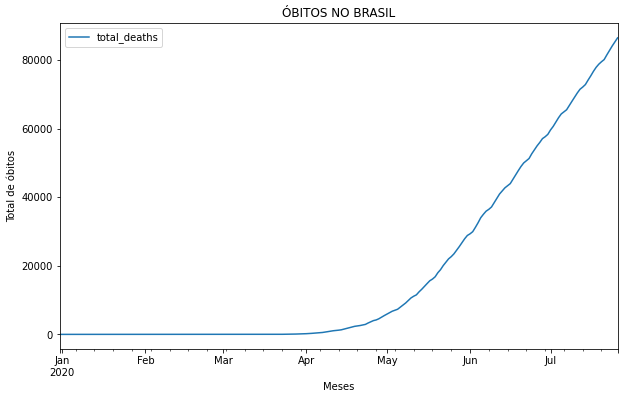

In [183]:
# gráfico do total de mortes Brasil
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

df_brasil.loc[df.location == 'Brazil'].plot('date', 'total_deaths', ax = ax)

plt.title('ÓBITOS NO BRASIL')
plt.xlabel('Meses')
plt.ylabel('Total de óbitos')

plt.show()

Como podemos verificar no gráfico acima, os óbitos no Brasil começam a se intensificar no mês de Abril em uma curva ascedente.

Que até o momento continua crescendo com o número de 86.449 óbitos.

Vamos verificar no gráfico abaixo o total de casos registrados no Brasil.

In [36]:
df_brasil.total_cases.max()

2394513.0

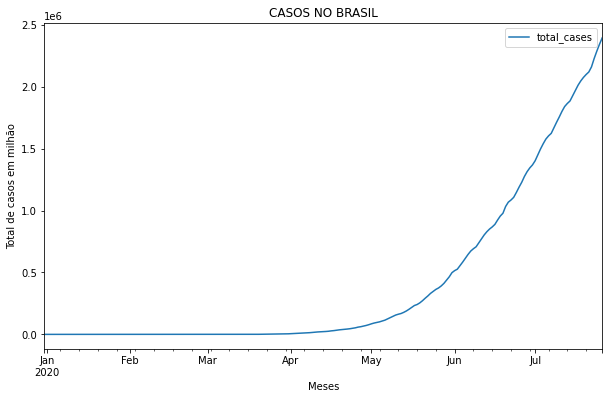

In [184]:
# total de casos no Brasil
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
df_brasil.loc[df.location == 'Brazil'].plot(x='date', y='total_cases', ax = ax)

plt.title('CASOS NO BRASIL')
plt.xlabel('Meses')
plt.ylabel('Total de casos em milhão')

plt.show()

Assim como o número de óbitos, o número de casos começa a se intensificar em Abril e vem tendo crescimento exponencial e continua crescendo diariamente. Chegando ao total de 2.394.513 de casos registrados até o momento.

Vamos verificar os cresimento de óbitos nos últimos 10 dias;

In [174]:
# criar cópia do dataset apenas com data e total de óbitos
df2 = df_brasil.loc[df_brasil.date > '2020-07-15', ['date', 'total_deaths']].copy()

Abaixo iremos verificar o número de óbitos diários dos últimos dez dias.

In [175]:
# calculando a diferença dos óbitos dos últimos dez dias
df2.date = df2.date.dt.date
df2.total_deaths = df2.total_deaths.diff()
df2.iloc[1:]

,date,total_deaths
4428,2020-07-17,1322.0
4429,2020-07-18,1163.0
4430,2020-07-19,921.0
4431,2020-07-20,716.0
4432,2020-07-21,632.0
4433,2020-07-22,1367.0
4434,2020-07-23,1284.0
4435,2020-07-24,1311.0
4436,2020-07-25,1156.0
4437,2020-07-26,1211.0


Abaixo iremos verificar num  gráfico o número de óbitos diários dos últimos dez dias.

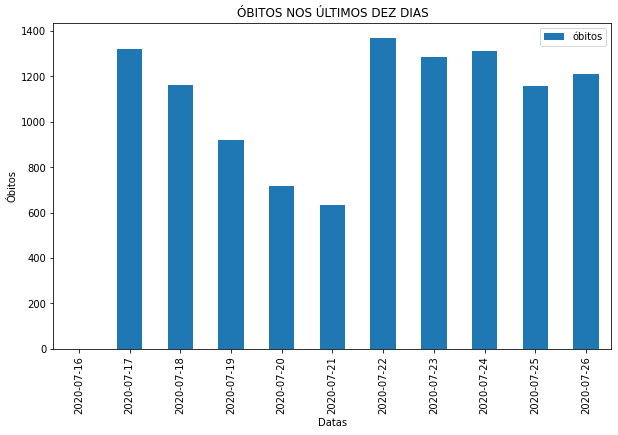

In [185]:
# gráfico de crescimento de óbitos nos últimos dez dias
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

df2.plot('date', 'total_deaths', kind='bar', label = 'óbitos', ax = ax)

plt.title('ÓBITOS NOS ÚLTIMOS DEZ DIAS')
plt.xlabel('Datas')
plt.ylabel('Óbitos')

plt.show()

Podemos ver no gráfico acima, uma variação nas data de 19 à 21, relacionado uma queda no número total de óbitos.

Isso pode ser em decorrência do final de semana, por ter uma dimnuição no número de pessooal para registro atualizado.

Percebendo-se que existe um aumento maior no próximo dia.

#Conclusão

Podemos verificar nessa análise exploratória dos dados obtidos sobre COVID-19, que existe um número extremamente alto de óbitos e um número maior ainda de casos no mundo. Vimos que segundo a curva dos gráficos ainda continua crescendo devido à  países que ainda estão enfrentando a crise e tendo seus número internos em crescimento e assim contribuindo para o número geral.

Como é o caso do Brasil. 
Que continua no meio da pandemia com mais de mil óbitos diários. Com uma curva de crescimento em acendência e com previsões não muito satisfatórias.

Verificando os gráficos que estão em estado crescente e sem o desenvolvimento de uma vacina efetiva com previsão para 2021. Acredita-se que esta pandemia tenha um período longo de duração, elevando ainda mais os números obitidos até a data desta análise.

Se compararmos com outras pandemias ocorridas na hitória da humanidade, a covid-19 tem suas difernças biológicas, sociais, temporais e geográficas, mas constumas trazer alguns pontos em comuns como o caos social, mudanças de comportamento e disseminação de informações falsas.

Percebemos a necessidade de investir e valorizar cada vez mais as pesquisas científicas, os estudos e os profissionais da saúde.

Mesmo com um histótico de pandemias, percebemos que temos muito a aprender e avançar para que esetes fenômenos não volte a assolar  terrivelmente a humanidade.